In [1]:
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
import matplotlib.colors as colors
from matplotlib.colors import TwoSlopeNorm
from matplotlib.ticker import MultipleLocator, FixedLocator,FormatStrFormatter

date = '7_19_2021'

#'''

# offset magnitude

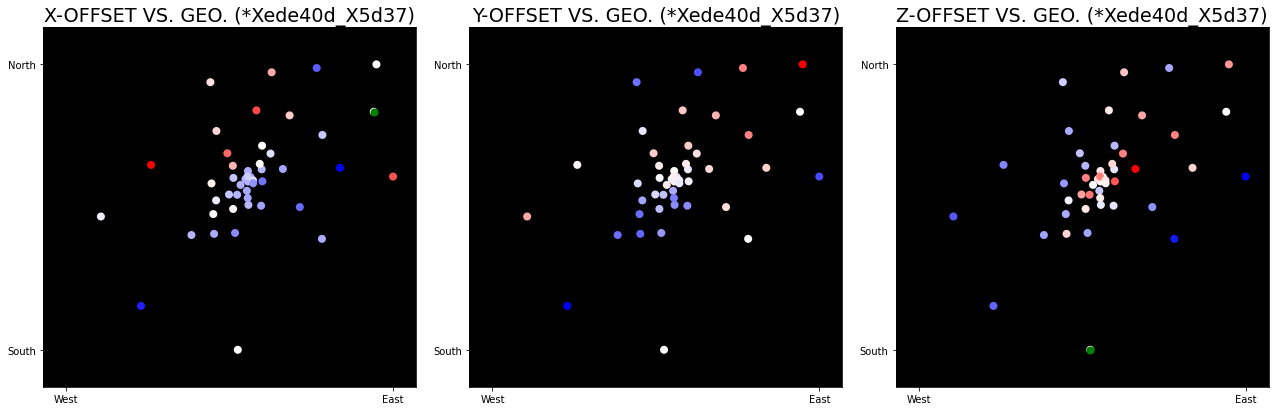

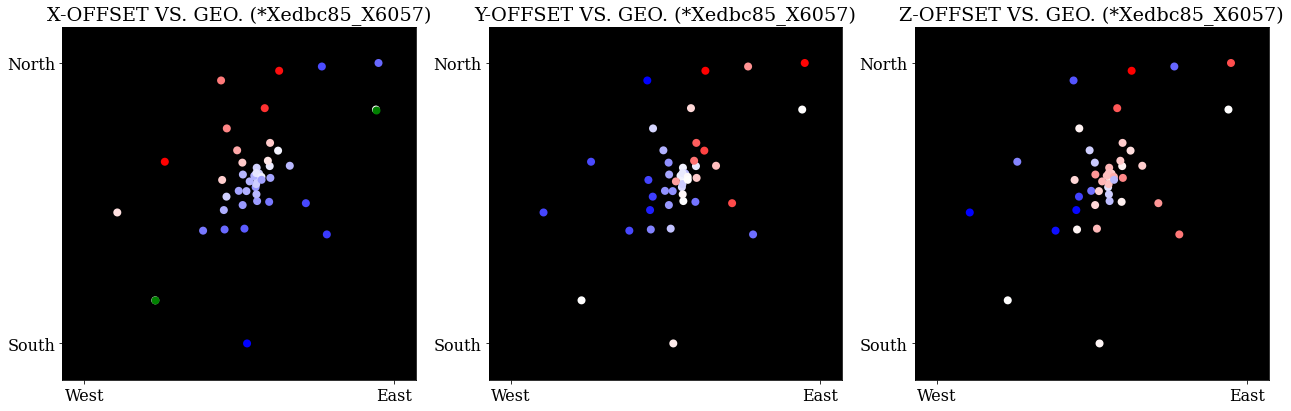

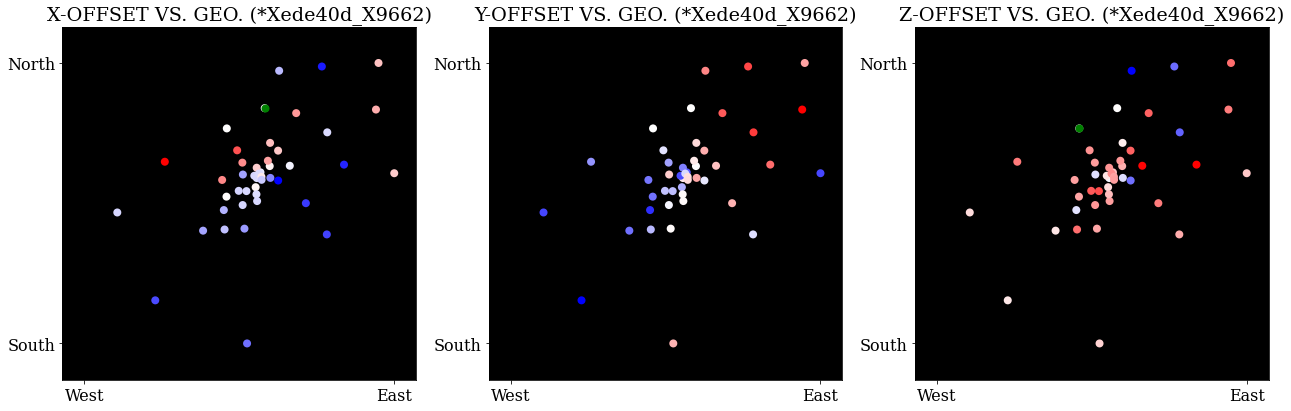

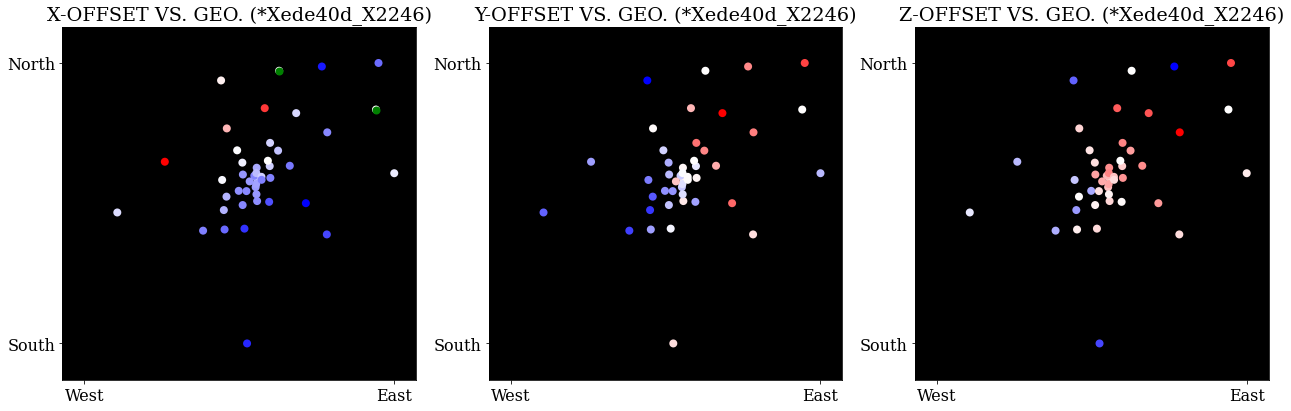

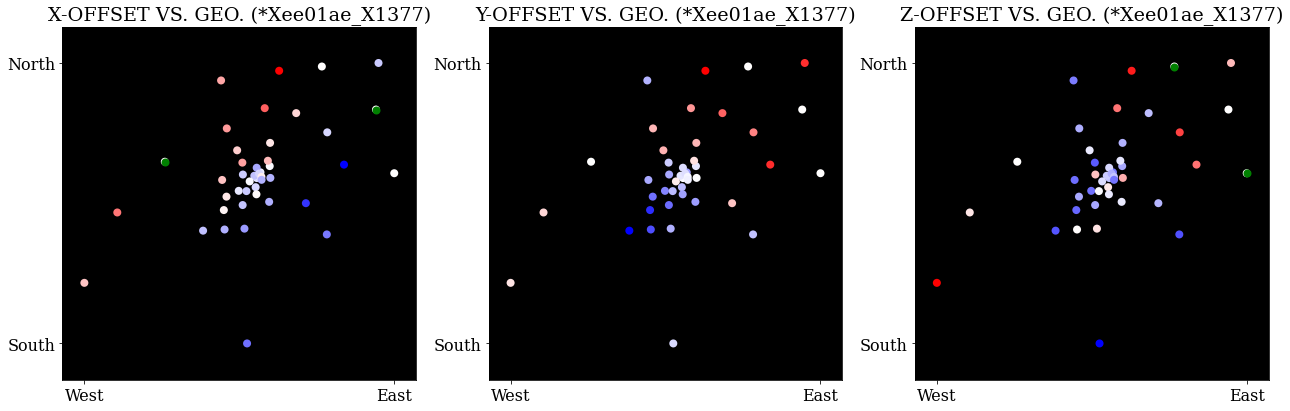

KeyboardInterrupt: 

In [2]:
if not os.path.isdir('/Users/colemeyer/Documents/ALMA Internship/Observational Data/'+date+'/geographyplots/'):
    os.mkdir('/Users/colemeyer/Documents/ALMA Internship/Observational Data/'+date+'/geographyplots/')
    os.mkdir('/Users/colemeyer/Documents/ALMA Internship/Observational Data/'+date+'/geographyplots/magnitude/')
    os.mkdir('/Users/colemeyer/Documents/ALMA Internship/Observational Data/'+date+'/geographyplots/delta/')
directory = '/Users/colemeyer/Documents/ALMA Internship/Observational Data/'+date+'/'

weather = np.array([[2226292.373,2223475.222,2226146.018,2218047.888,2229937.944,2229279.046,2225008.773,2202176.215],[-5440071.187,-5440620.327,-5439167.973,-5442740.475,-5435387.75,-5440478.349,-5440202.705,-5445210.627]])

o = 0

UpperLimitArrX = []
UpperLimitArrY = []
LowerLimitArrX = []
LowerLimitArrY = []
for file in os.listdir(directory): ##for subdirectory in 7_12_2021
    if os.path.isdir(directory+file) and file[:3] == 'uid':
        temp = np.genfromtxt(directory+file+'/AntPos.csv',delimiter=',',dtype='str',skip_header=2)
        pos = np.array((temp[:,3:]),dtype='float')
        UpperLimitArrX.append(np.max(pos[:,12]))
        UpperLimitArrY.append(np.max(pos[:,13]))
        LowerLimitArrX.append(np.min(pos[:,12]))
        LowerLimitArrY.append(np.min(pos[:,13]))
xMaxLim = max(UpperLimitArrX)+200
yMaxLim = max(UpperLimitArrY)+200
xMinLim = min(LowerLimitArrX)-200
yMinLim = min(LowerLimitArrY)-200

for file in os.listdir(directory): ##for subdirectory in 7_12_2021
    if os.path.isdir(directory+file) and file[:3] == 'uid':
        probs1 = np.empty((1,2),dtype='float')
        probs2 = np.empty((1,2),dtype='float')
        probs3 = np.empty((1,2),dtype='float')
        temp = np.genfromtxt(directory+file+'/AntPos.csv',delimiter=',',dtype='str',skip_header=2)
        pos = np.array((temp[:,3:]),dtype='float')

        k = np.sort(pos[:,0])
        dev = (k[-4]-k[4])/2
        xmax = k[-4]+dev
        xmin = k[4]-dev

        k = np.sort(pos[:,1])
        dev = (k[-4]-k[4])/2
        ymax = k[-4]+dev
        ymin = k[4]-dev

        k = np.sort(pos[:,2])
        dev = (k[-4]-k[4])/2
        zmax = k[-4]+dev
        zmin = k[4]-dev
    
    
        for j in range(np.shape(pos)[0]):
            if pos[j,0] > xmax:
                temp = np.empty((1,2),dtype='float')
                temp[0,:] = pos[j,12:14]
                probs1 = np.vstack((probs1,temp))
                pos[j,0:3] = 0
            if pos[j,1] > ymax:
                temp = np.empty((1,2),dtype='float')
                temp[0,:] = pos[j,12:14]
                probs2 = np.vstack((probs2,temp))
                pos[j,0:3] = 0
            if pos[j,2] > zmax:
                temp = np.empty((1,2),dtype='float')
                temp[0,:] = pos[j,12:14]
                probs3 = np.vstack((probs3,temp))
                pos[j,0:3] = 0
            if pos[j,0] < xmin:
                temp = np.empty((1,2),dtype='float')
                temp[0,:] = pos[j,12:14]
                probs1 = np.vstack((probs1,temp))
                pos[j,0:3] = 0
            if pos[j,1] < ymin:
                temp = np.empty((1,2),dtype='float')
                temp[0,:] = pos[j,12:14]
                probs2 = np.vstack((probs2,temp))
                pos[j,0:3] = 0
            if pos[j,2] < zmin:
                temp = np.empty((1,2),dtype='float')
                temp[0,:] = pos[j,12:14]
                probs3 = np.vstack((probs3,temp))
                pos[j,0:3] = 0
        if np.shape(probs1)[0] != 1:
            probs1 = probs1[1:,:]
        else:
            probs1 = ""
        if np.shape(probs2)[0] != 1:
            probs2 = probs2[1:,:]
        else:
            probs2 = ""
        if np.shape(probs3)[0] != 1:
            probs3 = probs3[1:,:]
        else:
            probs3 = ""

        xmin, xmax = xMinLim,xMaxLim
        ymin, ymax = yMinLim,yMaxLim

        #graph parameters
        width,height = 18,6
        xMajors,xMinors = 5,5
        yMajors,yMinors = 5,5

        #X PLOT

        fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(width,height))

        title='X-OFFSET VS. GEO. (*'+file[11:]+')'

        #ax1.scatter(weather[0,:],weather[1,:],color='g',linestyle='-',linewidth=2)

        ax1.scatter(pos[:,12],pos[:,13],norm=TwoSlopeNorm(0),c=pos[:,0],cmap=plt.cm.bwr,linestyle='-',linewidth=2)
        if type(probs1) != str:
            ax1.scatter(probs1[:,0],probs1[:,1],color='g',linestyle='-',linewidth=2)

        ##########

        plt.rc("font", size=16,family='serif')
        ax1.set_xlim(xmin,xmax)
        ax1.set_ylim(ymin,ymax)
        x_minor_ticks = MultipleLocator(((xmax - xmin) / xMajors) / xMinors)
        y_minor_ticks = MultipleLocator(((ymax - ymin) / yMajors) / yMinors)
        ax1.set_xticks([xmin+200,xmax-200])
        ax1.set_yticks([ymin+200,ymax-200])
        ax1.xaxis.set_minor_locator(x_minor_ticks)
        ax1.yaxis.set_minor_locator(y_minor_ticks)
        ax1.tick_params(which='minor',axis='both',direction='in',length=4,width=2.25,top=True,right=True,labelsize=14)
        ax1.set_xticklabels(['West','East'])
        ax1.set_yticklabels(['South','North'])
        ax1.set_title(title,fontsize=14)
        ax1.set_facecolor('xkcd:black')
        plt.tight_layout()

        #Y PLOT

        title='Y-OFFSET VS. GEO. (*'+file[11:]+')'

        #ax2.scatter(weather[0,:],weather[1,:],color='g',linestyle='-',linewidth=2)

        ax2.scatter(pos[:,12],pos[:,13],norm=TwoSlopeNorm(0),c=pos[:,1],cmap=plt.cm.bwr,linestyle='-',linewidth=2)
        if type(probs2) != str:
            ax1.scatter(probs2[:,0],probs2[:,1],color='g',linestyle='-',linewidth=2)

        ##########

        plt.rc("font", size=16,family='serif')
        ax2.set_xlim(xmin,xmax)
        ax2.set_ylim(ymin,ymax)
        x_minor_ticks = MultipleLocator(((xmax - xmin) / xMajors) / xMinors)
        y_minor_ticks = MultipleLocator(((ymax - ymin) / yMajors) / yMinors)
        ax2.set_xticks([xmin+200,xmax-200])
        ax2.set_yticks([ymin+200,ymax-200])
        ax2.xaxis.set_minor_locator(x_minor_ticks)
        ax2.yaxis.set_minor_locator(y_minor_ticks)
        ax2.tick_params(which='minor',axis='both',direction='in',length=4,width=2.25,top=True,right=True,labelsize=14)
        ax2.set_xticklabels(['West','East'])
        ax2.set_yticklabels(['South','North'])
        ax2.set_title(title,fontsize=14)
        ax2.set_facecolor('xkcd:black')
        plt.tight_layout()

        #Z PLOT

        title='Z-OFFSET VS. GEO. (*'+file[11:]+')'

        #ax3.scatter(weather[0,:],weather[1,:],color='g',linestyle='-',linewidth=2)

        ax3.scatter(pos[:,12],pos[:,13],norm=TwoSlopeNorm(0),c=pos[:,2],cmap=plt.cm.bwr,linestyle='-',linewidth=2)
        if type(probs3) != str:
            ax3.scatter(probs3[:,0],probs3[:,1],color='g',linestyle='-',linewidth=2)
        ##########

        plt.rc("font", size=16,family='serif')
        ax3.set_xlim(xmin,xmax)
        ax3.set_ylim(ymin,ymax)
        x_minor_ticks = MultipleLocator(((xmax - xmin) / xMajors) / xMinors)
        y_minor_ticks = MultipleLocator(((ymax - ymin) / yMajors) / yMinors)
        ax3.set_xticks([xmin+200,xmax-200])
        ax3.set_yticks([ymin+200,ymax-200])
        ax3.xaxis.set_minor_locator(x_minor_ticks)
        ax3.yaxis.set_minor_locator(y_minor_ticks)
        ax3.tick_params(which='minor',axis='both',direction='in',length=4,width=2.25,top=True,right=True,labelsize=14)
        ax3.set_xticklabels(['West','East'])
        ax3.set_yticklabels(['South','North'])
        ax3.set_title(title,fontsize=14)
        ax3.set_facecolor('xkcd:black')
        plt.tight_layout()

        plt.show()
        #plt.savefig(directory+'geographyplots/magnitude/maggeo'+str(o)+'.png', bbox_inches='tight')
        #plt.close()
        
        o += 1
        
#'''

# offset change (1-day average)

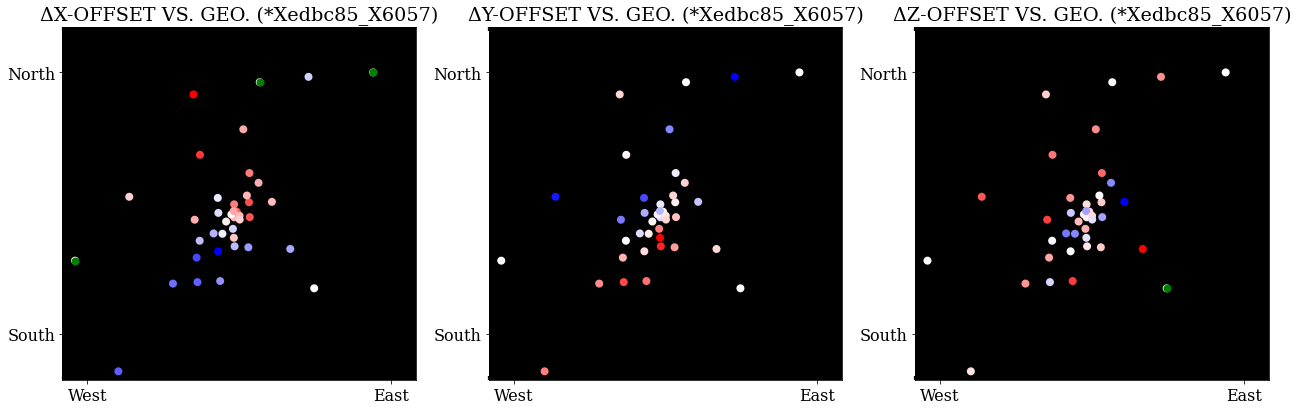

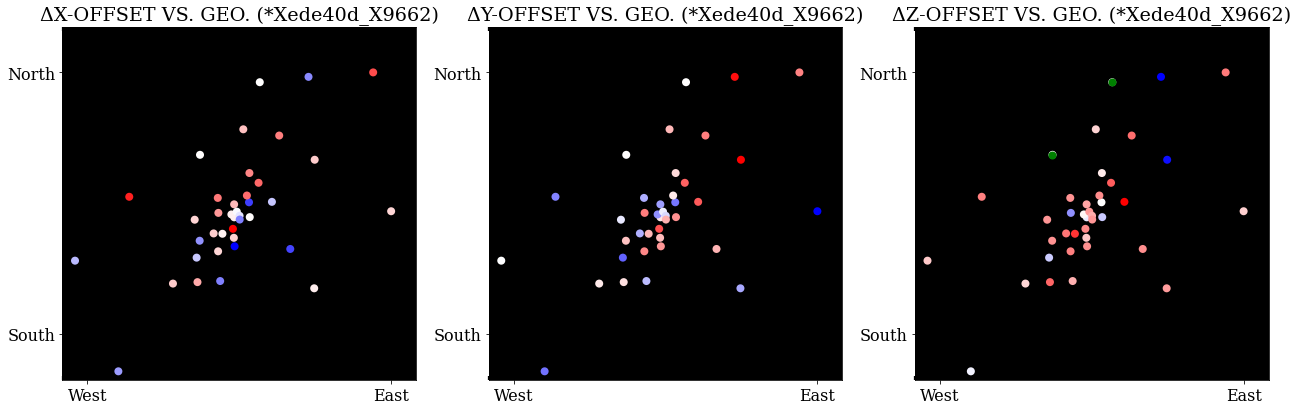

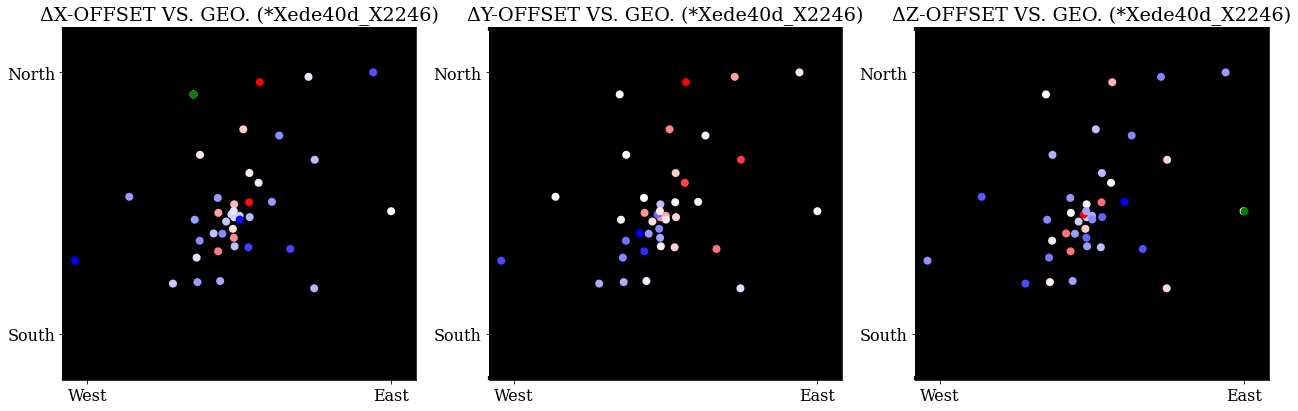

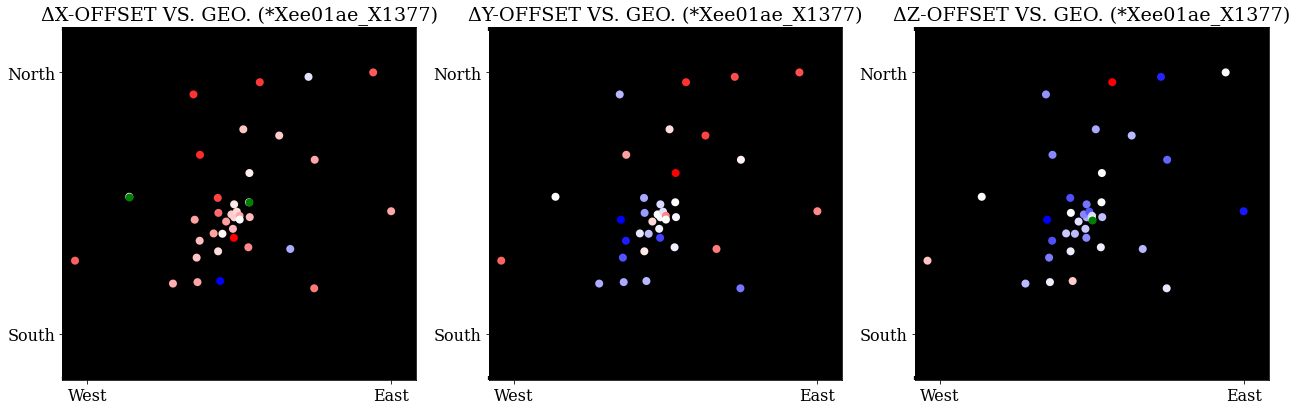

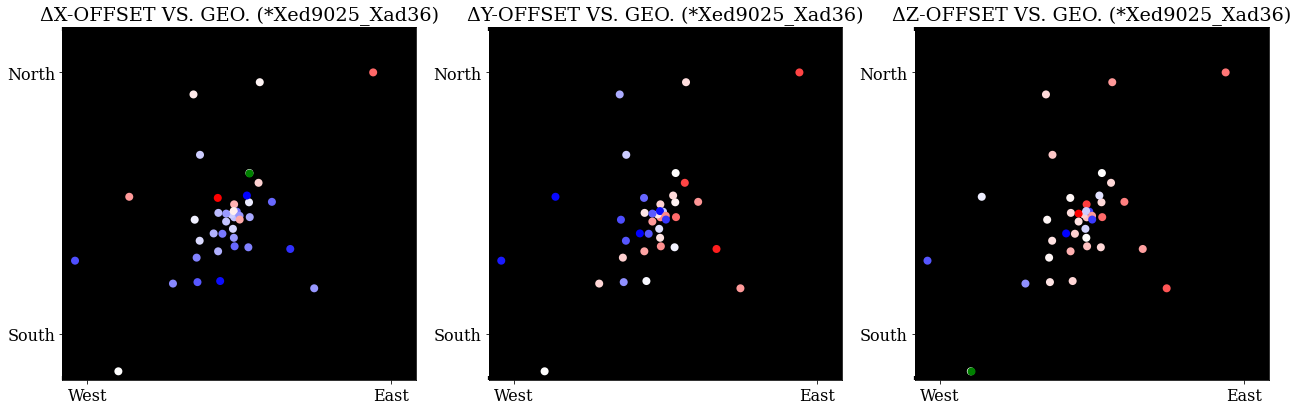

KeyboardInterrupt: 

In [3]:
if not os.path.isdir('/Users/colemeyer/Documents/ALMA Internship/Observational Data/'+date+'/geographyplots/'):
    os.mkdir('/Users/colemeyer/Documents/ALMA Internship/Observational Data/'+date+'/geographyplots/')
    os.mkdir('/Users/colemeyer/Documents/ALMA Internship/Observational Data/'+date+'/geographyplots/magnitude/')
    os.mkdir('/Users/colemeyer/Documents/ALMA Internship/Observational Data/'+date+'/geographyplots/delta/')
directory = '/Users/colemeyer/Documents/ALMA Internship/Observational Data/'+date+'/'

weather = np.array([[2226292.373,2223475.222,2226146.018,2218047.888,2229937.944,2229279.046,2225008.773,2202176.215],[-5440071.187,-5440620.327,-5439167.973,-5442740.475,-5435387.75,-5440478.349,-5440202.705,-5445210.627]])

o = 0

UpperLimitArrX = []
UpperLimitArrY = []
LowerLimitArrX = []
LowerLimitArrY = []

for file in os.listdir(directory): ##for subdirectory in 7_12_2021
    if os.path.isdir(directory+file) and file[:3] == 'uid':
        temp = np.genfromtxt(directory+file+'/AntPos.csv',delimiter=',',dtype='str',skip_header=2)
        pos = np.array((temp[:,3:]),dtype='float')
            
        UpperLimitArrX.append(np.max(pos[:,12]))
        UpperLimitArrY.append(np.max(pos[:,13]))
        LowerLimitArrX.append(np.min(pos[:,12]))
        LowerLimitArrY.append(np.min(pos[:,13]))
            
xMaxLim = max(UpperLimitArrX)+200
yMaxLim = max(UpperLimitArrY)+200
xMinLim = min(LowerLimitArrX)+200
yMinLim = min(LowerLimitArrY)+200

first = True
for file in os.listdir(directory): ##for subdirectory in 7_12_2021
    if os.path.isdir(directory+file) and file[:3] == 'uid':
#for i in range(2):
    #if 1 == 1:
        if first:
            #file = 'uid___A002_Xed9025_X9c7d'
            temp = np.genfromtxt(directory+file+'/AntPos.csv',delimiter=',',dtype='str',skip_header=2)
            oldpos = np.array((temp[:,3:9]),dtype='float')
            oldpos[:,3:5] = temp[:,15:17]
            oldpos[:,5] = temp[:,18]
            oldposnames = temp[:,0]
            first = False
        else:
            #file = 'uid___A002_Xed8123_X1b10'
            probs1 = np.empty((1,2),dtype='float')
            probs2 = np.empty((1,2),dtype='float')
            probs3 = np.empty((1,2),dtype='float')
            temp = np.genfromtxt(directory+file+'/AntPos.csv',delimiter=',',dtype='str',skip_header=2)
            pos = np.array((temp[:,3:9]),dtype='float')
            pos[:,3:5] = temp[:,15:17]
            pos[:,5] = temp[:,18]
            posnames = temp[:,0]
            
            if np.shape(pos)[0] > np.shape(oldpos)[0]:
                pos = pos[:np.shape(oldpos)[0],:]
            else:
                oldpos = oldpos[:np.shape(pos)[0],:]
            pos1 = pos
            
            ###################
            
            arr = np.empty((1,6),dtype='float')
            
            for i in range(np.shape(pos)[0]):
                for j in range(np.shape(oldpos)[0]):
                    if posnames[i] == oldposnames[j] and pos[i,5] != 0 and oldpos[i,5] != 0:
                        temp = np.empty((1,6),dtype='float')
                        temp[0,:3] = pos[i,:3]-oldpos[j,:3]
                        temp[0,3:] = pos[i,3:]
                        arr = np.vstack((arr,temp))        
            pos = arr[1:,:]
            oldpos = pos1
            
            ###################

            k = np.sort(pos[:,0])
            dev = (k[-4]-k[4])/2
            xmax = k[-4]+dev
            xmin = k[4]-dev

            k = np.sort(pos[:,1])
            dev = (k[-4]-k[4])/2
            ymax = k[-4]+dev
            ymin = k[4]-dev

            k = np.sort(pos[:,2])
            dev = (k[-4]-k[4])/2
            zmax = k[-4]+dev
            zmin = k[4]-dev


            for j in range(np.shape(pos)[0]):
                if pos[j,0] > xmax:
                    temp = np.empty((1,2),dtype='float')
                    temp[0,:] = pos[j,3:5]
                    probs1 = np.vstack((probs1,temp))
                    pos[j,0:3] = 0
                if pos[j,1] > ymax:
                    temp = np.empty((1,2),dtype='float')
                    temp[0,:] = pos[j,3:5]
                    probs2 = np.vstack((probs2,temp))
                    pos[j,0:3] = 0
                if pos[j,2] > zmax:
                    temp = np.empty((1,2),dtype='float')
                    temp[0,:] = pos[j,3:5]
                    probs3 = np.vstack((probs3,temp))
                    pos[j,0:3] = 0
                if pos[j,0] < xmin:
                    temp = np.empty((1,2),dtype='float')
                    temp[0,:] = pos[j,3:5]
                    probs1 = np.vstack((probs1,temp))
                    pos[j,0:3] = 0
                if pos[j,1] < ymin:
                    temp = np.empty((1,2),dtype='float')
                    temp[0,:] = pos[j,3:5]
                    probs2 = np.vstack((probs2,temp))
                    pos[j,0:3] = 0
                if pos[j,2] < zmin:
                    temp = np.empty((1,2),dtype='float')
                    temp[0,:] = pos[j,3:5]
                    probs3 = np.vstack((probs3,temp))
                    pos[j,0:3] = 0
            if np.shape(probs1)[0] != 1:
                probs1 = probs1[1:,:]
            else:
                probs1 = ""
            if np.shape(probs2)[0] != 1:
                probs2 = probs2[1:,:]
            else:
                probs2 = ""
            if np.shape(probs3)[0] != 1:
                probs3 = probs3[1:,:]
            else:
                probs3 = ""

            xmin, xmax = xMinLim,xMaxLim
            ymin, ymax = yMinLim,yMaxLim

            #graph parameters
            width,height = 18,6
            xMajors,xMinors = 5,5
            yMajors,yMinors = 5,5

            #X PLOT

            fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(width,height))

            title='ΔX-OFFSET VS. GEO. (*'+file[11:]+')'

            #ax1.scatter(weather[0,:],weather[1,:],color='g',linestyle='-',linewidth=2)

            ax1.scatter(pos[:,3],pos[:,4],norm=TwoSlopeNorm(0),c=pos[:,0],cmap=plt.cm.bwr,linestyle='-',linewidth=2)
            if type(probs1) != str:
                ax1.scatter(probs1[:,0],probs1[:,1],color='g',linestyle='-',linewidth=2)

            ##########

            plt.rc("font", size=16,family='serif')
            ax1.set_xlim(xmin,xmax)
            ax1.set_ylim(ymin,ymax)
            x_minor_ticks = MultipleLocator(((xmax - xmin) / xMajors) / xMinors)
            y_minor_ticks = MultipleLocator(((ymax - ymin) / yMajors) / yMinors)
            ax1.set_xticks([xmin+200,xmax-200])
            ax1.set_yticks([ymin+200,ymax-200])
            ax1.xaxis.set_minor_locator(x_minor_ticks)
            ax1.yaxis.set_minor_locator(y_minor_ticks)
            ax1.tick_params(which='minor',axis='both',direction='in',length=4,width=2.25,top=True,right=True,labelsize=14)
            ax1.set_xticklabels(['West','East'])
            ax1.set_yticklabels(['South','North'])
            ax1.set_title(title,fontsize=14)
            ax1.set_facecolor('xkcd:black')
            plt.tight_layout()

            #Y PLOT

            title='ΔY-OFFSET VS. GEO. (*'+file[11:]+')'

            #ax2.scatter(weather[0,:],weather[1,:],color='g',linestyle='-',linewidth=2)

            ax2.scatter(pos[:,3],pos[:,4],norm=TwoSlopeNorm(0),c=pos[:,1],cmap=plt.cm.bwr,linestyle='-',linewidth=2)
            if type(probs2) != str:
                ax1.scatter(probs2[:,0],probs2[:,1],color='g',linestyle='-',linewidth=2)

            ##########

            plt.rc("font", size=16,family='serif')
            ax2.set_xlim(xmin,xmax)
            ax2.set_ylim(ymin,ymax)
            x_minor_ticks = MultipleLocator(((xmax - xmin) / xMajors) / xMinors)
            y_minor_ticks = MultipleLocator(((ymax - ymin) / yMajors) / yMinors)
            ax2.set_xticks([xmin+200,xmax-200])
            ax2.set_yticks([ymin+200,ymax-200])
            ax2.xaxis.set_minor_locator(x_minor_ticks)
            ax2.yaxis.set_minor_locator(y_minor_ticks)
            ax2.tick_params(which='minor',axis='both',direction='in',length=4,width=2.25,top=True,right=True,labelsize=14)
            ax2.set_xticklabels(['West','East'])
            ax2.set_yticklabels(['South','North'])
            ax2.set_title(title,fontsize=14)
            ax2.set_facecolor('xkcd:black')
            plt.tight_layout()

            #Z PLOT

            title='ΔZ-OFFSET VS. GEO. (*'+file[11:]+')'

            #ax3.scatter(weather[0,:],weather[1,:],color='g',linestyle='-',linewidth=2)

            ax3.scatter(pos[:,3],pos[:,4],norm=TwoSlopeNorm(0),c=pos[:,2],cmap=plt.cm.bwr,linestyle='-',linewidth=2)
            if type(probs3) != str:
                ax3.scatter(probs3[:,0],probs3[:,1],color='g',linestyle='-',linewidth=2)
            ##########

            plt.rc("font", size=16,family='serif')
            ax3.set_xlim(xmin,xmax)
            ax3.set_ylim(ymin,ymax)
            x_minor_ticks = MultipleLocator(((xmax - xmin) / xMajors) / xMinors)
            y_minor_ticks = MultipleLocator(((ymax - ymin) / yMajors) / yMinors)
            ax3.set_xticks([xmin+200,xmax-200])
            ax3.set_yticks([ymin+200,ymax-200])
            ax3.xaxis.set_minor_locator(x_minor_ticks)
            ax3.yaxis.set_minor_locator(y_minor_ticks)
            ax3.tick_params(which='minor',axis='both',direction='in',length=4,width=2.25,top=True,right=True,labelsize=14)
            ax3.set_xticklabels(['West','East'])
            ax3.set_yticklabels(['South','North'])
            ax3.set_title(title,fontsize=14)
            ax3.set_facecolor('xkcd:black')
            plt.tight_layout()


            plt.show()
            #plt.savefig(directory+'geographyplots/delta/deltageo'+str(o)+'.png', bbox_inches='tight')
            #plt.close()
            
            o += 1
        
#'''